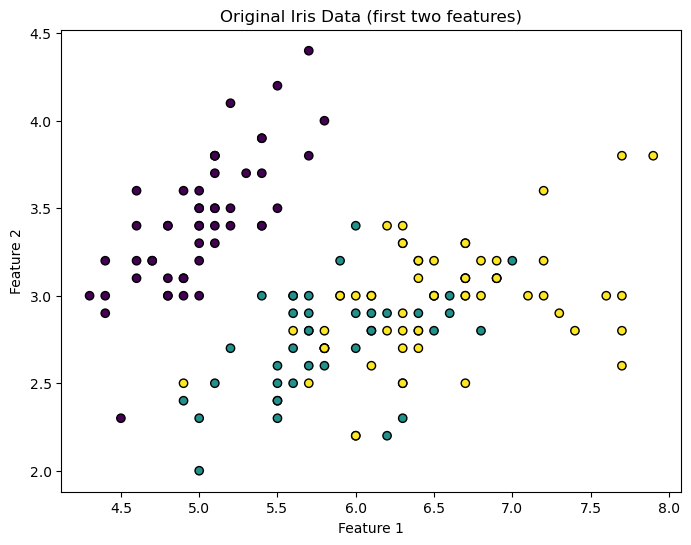

Global cluster centers after training:
[[5.88460969 2.7521228  4.34962936 1.39234304]
 [5.00313158 3.41337398 1.48315261 0.25350434]
 [6.76424786 3.05516252 5.63660937 2.04441204]]


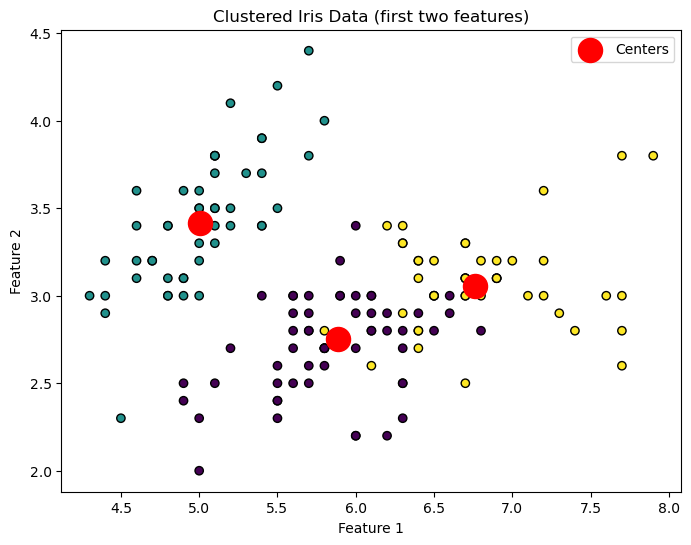

In [2]:
import numpy as np
import torch
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from global_learner import GlobalClusterer  # Make sure to import your GlobalClusterer and local learners
from local_learners import FuzzyCMeansClient

# Parameters
num_clients = 3
num_clusters = 3  # There are 3 clusters in the Iris dataset
data_dim = 4  # The Iris dataset has 4 features
rounds = 10

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Convert the dataset to a TensorDataset (simulating the train_dataset you mentioned)
train_dataset = torch.utils.data.TensorDataset(torch.tensor(X, dtype=torch.float32), torch.tensor(y, dtype=torch.long))

# Simulate splitting the dataset among clients
client_data = []
for i in range(num_clients):
    client_data.append(train_dataset.tensors[0][i::num_clients].detach().cpu().numpy())

# Initialize clients as instances of FuzzyCMeansClient or KMeansClient
clients = [FuzzyCMeansClient(client_data[i], num_clusters) for i in range(num_clients)]

# Initialize the global clusterer
global_clusterer = GlobalClusterer(clients, num_clusters, data_dim, max_rounds=rounds)

# Plot the original data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', marker='o', edgecolor='k')
plt.title('Original Iris Data (first two features)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Run the federated fuzzy clustering (this is your training process)
global_clusterer.fit()

# Output the results
print("Global cluster centers after training:")
print(global_clusterer.cluster_centers)

# Predict cluster assignments using the final global centers
final_centers = np.array(global_clusterer.cluster_centers)
distances = cdist(X, final_centers)
predicted_labels = np.argmin(distances, axis=1)

# Plot the clustered data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=predicted_labels, cmap='viridis', marker='o', edgecolor='k')
plt.scatter(final_centers[:, 0], final_centers[:, 1], s=300, c='red', label='Centers')
plt.title('Clustered Iris Data (first two features)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()
